# Homework assignment 3
Return this notebook (filled with your answers) by the deadline via mycourses.  Also provide pdf printout of the notebook.

Note that the notebook that you submit needs to work, that is, if running it produces errors, then that may result in reduction of points.

The first two questions related to lecture notes by Prof. Ollila and the last two questions to lecture notes by Prof. Vorobyov. 

_My name_: Nguyen Xuan Binh <br>
_My student number_: 887799

In [1]:
import pandas as pd
from sklearn import linear_model as LM

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
# I need this "time" library to stop the code for debugging purposes. Nothing related to this assignment
import time
# This library is for displaying images
from IPython.display import Image, display
# This library is for using matplotlib figure feature
from matplotlib.pyplot import figure

***

##  Question 1: look at the data (basic operations)  
Load the data in _prostate.txt_ to your workspace. You can consult the file _prostate.info.txt_ for description of  the data set. 

In [3]:
data_table = pd.read_csv('prostate.txt', sep='\t')
predictors=list(data_table.columns[1:-2])
data_table

Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0            1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1            2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2            3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3            4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4            5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
..         ...       ...       ...  ...       ...  ...       ...      ...   
92          93  2.830268  3.876396   68 -1.386294    1  1.321756        7   
93          94  3.821004  3.896909   44 -1.386294    1  2.169054        7   
94          95  2.907447  3.396185   52 -1.386294    1  2.463853        7   
95          96  2.882564  3.773910   68  1.558145    1  1.558145        7   
96          97  3.471966  3.974998   68  0.438255    1  2.904165        7   

    pgg45      lpsa train  
0       0 -0.430783     T  
1       0 -0.162519     T  
2      20 -0.162519     T  
3       0 -0.162519     T  
4       0  0.371564     T  
..    ...       ...   ...  
92     60  4.385147     T  
93     40  4.684443     T  
94     10  5.143124     F  
95     80  5.477509     T  
96     20  5.582932     F  

[97 rows x 11 columns]

### 1 a)
Make a scatterplot matrix of the prostate cancer variables,  where the first row shows the response against each of the predictors in turn. <br>
_Hint_: you should get the same picture that  is displayed in Figure 1.1., page 3,  of  Hastie et al. (2017). 
https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12_toc.pdf

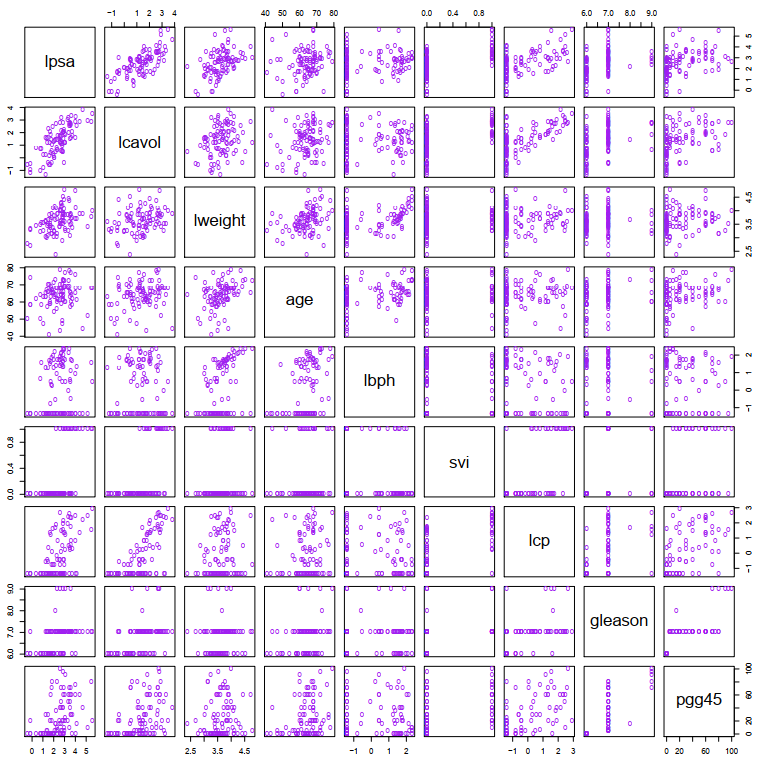

In [4]:
# Referenced Figure 1.1
Image("images/scatterplot.png")

### The reconstructed scatterplot

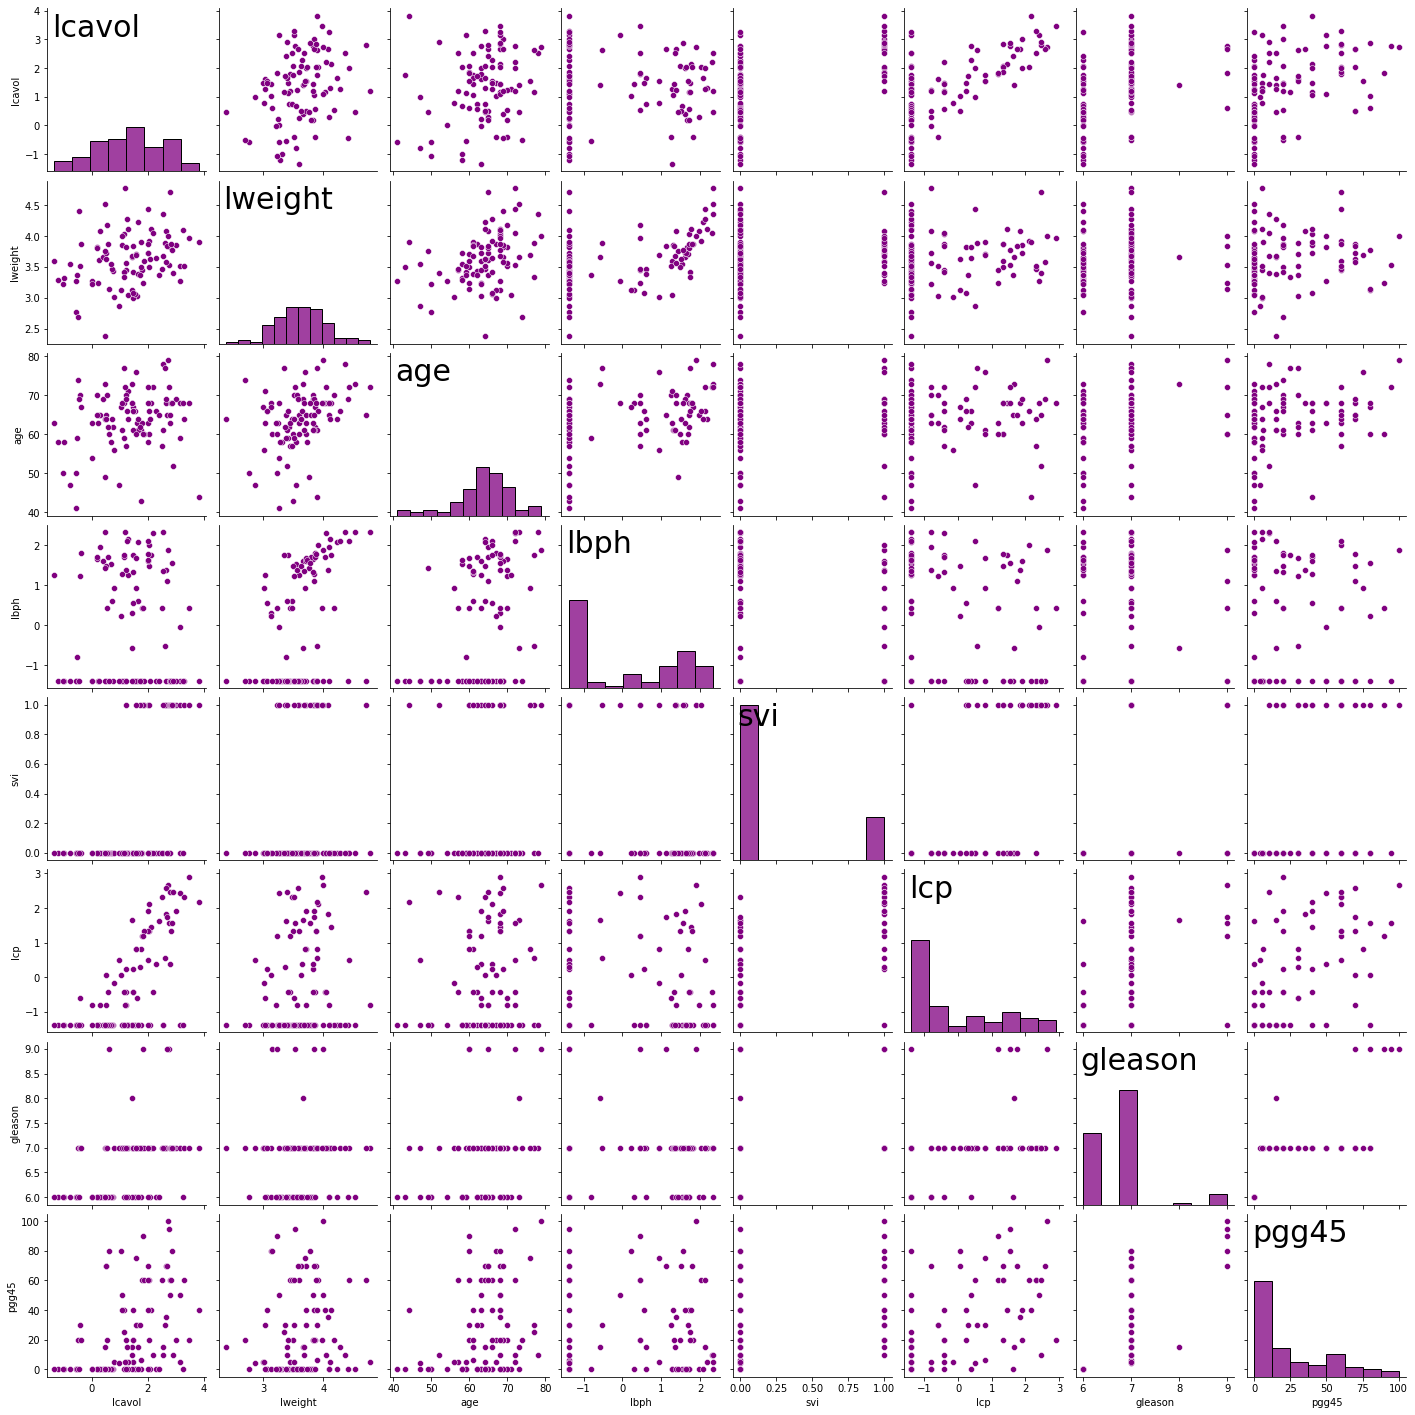

In [5]:
# write solution here
selected_columns = data_table[predictors]

it = iter(list(selected_columns.columns))

def diagfunc(*args, **kws):
    plt.gca().annotate(next(it), xy=(0, 1), xytext=(5,-5), ha="left", va="top", fontsize=30,
                       xycoords=plt.gca().transAxes, textcoords="offset points")

sns.pairplot(selected_columns, diag_kind="hist", plot_kws ={"color":"purple"}, diag_kws ={"color":"purple"}).map_diag(diagfunc)

### 1 b)
Center  and standardize all predictors to have mean zero and unit sample variance

In [6]:
# write solution here

# center all predictors to mean zero
data_table[predictors] = data_table[predictors] - data_table[predictors].mean()

# standardize all predictors to unit sample variance
data_table[predictors] = data_table[predictors] / data_table[predictors].std()

print("Mean of the predictors:\n")
print(data_table[predictors].mean())
print("\nStandard deviation of the predictors:\n")
print(data_table[predictors].std())

Mean of the predictors:

lcavol     3.433679e-17
lweight    6.947478e-16
age        3.960177e-16
lbph      -1.917138e-17
svi        4.807151e-17
lcp        7.325183e-17
gleason    2.060208e-17
pgg45      1.630998e-17
dtype: float64

Standard deviation of the predictors:

lcavol     1.0
lweight    1.0
age        1.0
lbph       1.0
svi        1.0
lcp        1.0
gleason    1.0
pgg45      1.0
dtype: float64


## 1 c) 
Split data into the training and test sets, according to the labels in the last column in _prostate.txt_.

In [7]:
# write solution here

# Split data into the training and testting dataframes, according to the train column
data_train = data_table[data_table['train'] == 'T'].drop('train', axis=1)
data_test = data_table[data_table['train'] == 'F'].drop('train', axis=1)

print("Training dataframe\n")
print(data_train.head())

print("\nTesting dataframe\n")
print(data_test.head())

Training dataframe

   Unnamed: 0    lcavol   lweight       age      lbph       svi       lcp  \
0           1 -1.637356 -2.006212 -1.862426 -1.024706 -0.522941 -0.863171   
1           2 -1.988980 -0.722009 -0.787896 -1.024706 -0.522941 -0.863171   
2           3 -1.578819 -2.188784  1.361163 -1.024706 -0.522941 -0.863171   
3           4 -2.166917 -0.807994 -0.787896 -1.024706 -0.522941 -0.863171   
4           5 -0.507874 -0.458834 -0.250631 -1.024706 -0.522941 -0.863171   

    gleason     pgg45      lpsa  
0 -1.042157 -0.864467 -0.430783  
1 -1.042157 -0.864467 -0.162519  
2  0.342627 -0.155348 -0.162519  
3 -1.042157 -0.864467 -0.162519  
4 -1.042157 -0.864467  0.371564  

Testing dataframe

    Unnamed: 0    lcavol   lweight       age      lbph       svi       lcp  \
6            7 -0.519967 -0.362793  0.018001  0.354858 -0.522941 -0.863171   
8            9 -1.804254 -0.208757 -2.265375 -1.024706 -0.522941 -0.863171   
9           10 -0.956085 -0.897266 -0.116315 -1.024706 -0.5

### 1 d)
* Fit a LS linear regression (with intercept) on the training set.  Report the estimated regression coefficients
* Plot the residuals versus observation number. 

Hint: you should get exactly the same results as given in Table 3.2, page 50, of Hastie et al., (2009) and shown below: 

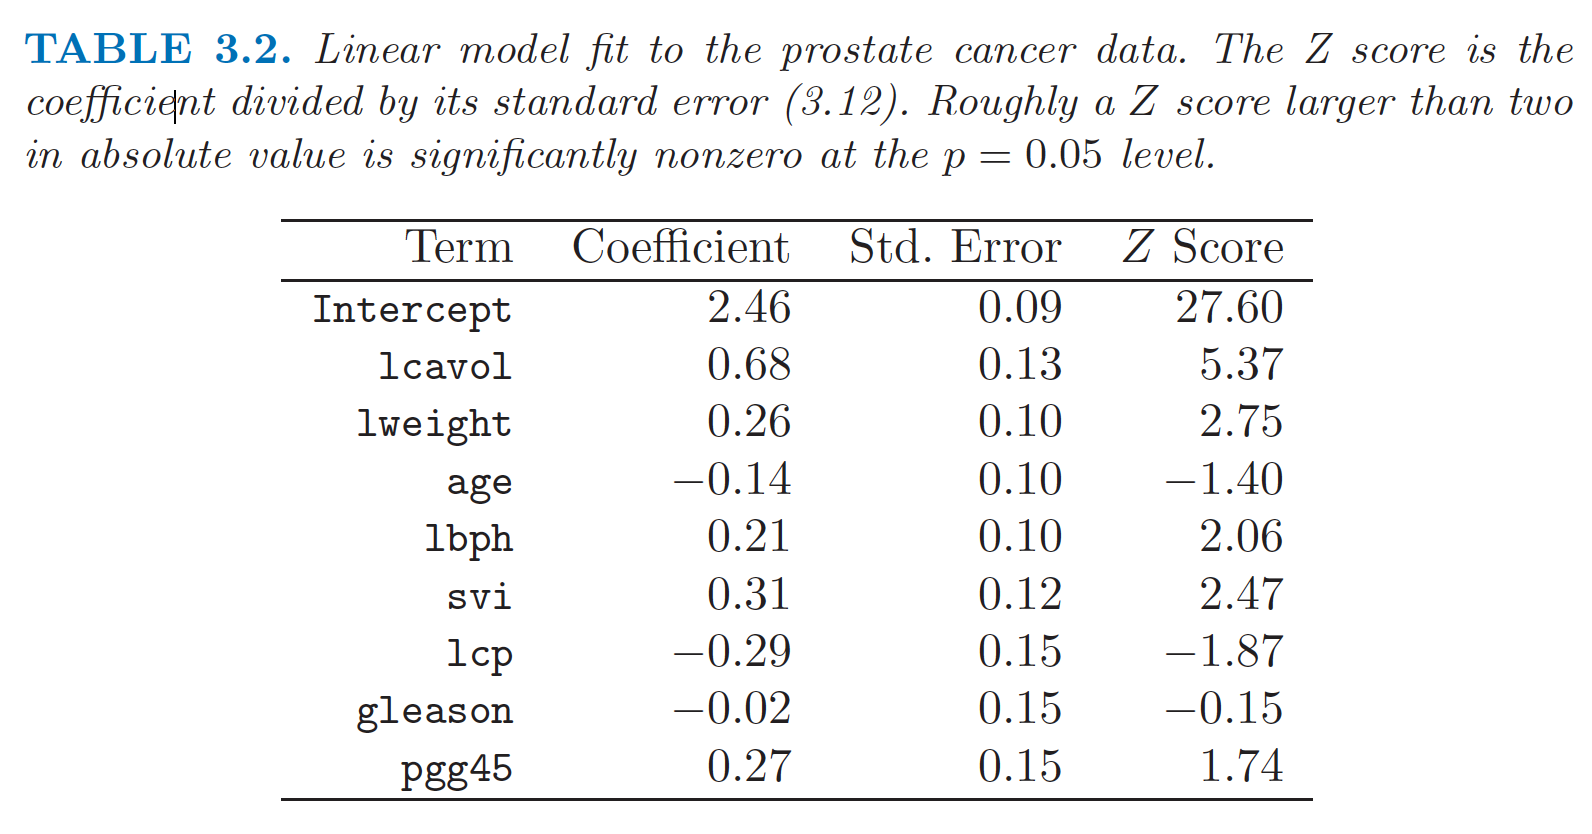

In [8]:
# <img style="width:600px" src="ESLII_table3dot2.png">
Image("images/ESLII_table3dot2.png", width=600)

The estimated coefficients are: 
        Term  Coefficient  Std.Error    Z Score
0  Intercept     2.464933   0.083100  29.662258
1     lcavol     0.679528   0.117818   5.767632
2    lweight     0.263053   0.088974   2.956519
3        age    -0.141465   0.094291  -1.500308
4       lbph     0.210147   0.095106   2.209601
5        svi     0.305201   0.115000   2.653929
6        lcp    -0.288493   0.143776  -2.006538
7    gleason    -0.021305   0.135140  -0.157651
8      pgg45     0.266956   0.142924   1.867812

Plot the residuals versus observation number


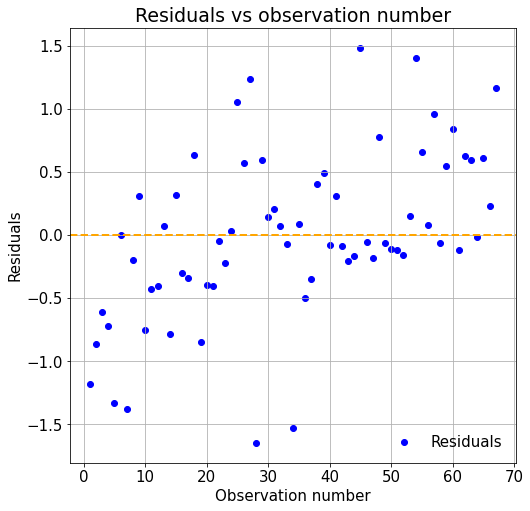

In [9]:
X_train = data_train[predictors].to_numpy()
y_train = data_train["lpsa"].to_numpy()
reg = LM.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
residuals = y_train - y_pred

coefficients = []
coefficients.append(reg.intercept_)
coefficients.extend(reg.coef_)
terms = predictors[:]
terms.insert(0, "Intercept")


intercept_list = np.concatenate((np.ones((len(y_train), 1)), X_train), axis=1)
#intercept_list = np.concatenate((X_train, np.ones((len(y_train), 1))), axis=1)
MSE = np.mean((y_train - y_pred)**2)
SE = np.sqrt(np.diag(MSE * np.linalg.inv(intercept_list.T @ intercept_list)))

Z_Score = coefficients/SE
#print(intercept_list)
df = pd.DataFrame({'Term': terms, 'Coefficient': coefficients, 'Std.Error':SE,"Z Score":Z_Score})

print("The estimated coefficients are: ")
print(df)

print("\nPlot the residuals versus observation number")
size = 15
observation_number = range(1,len(y_train) + 1)
plt.title(f"Residuals vs observation number", size=size + 4)
plt.scatter(observation_number, residuals, label = "Residuals", color="blue")
plt.axhline(y=0, color='orange', lw=2, linestyle="--")
plt.xticks(fontsize=size)    
plt.yticks(fontsize=size)  
#plt.ylim([0, 0.5])
#plt.xlim([0, 200])
plt.xlabel("Observation number", size=size)
plt.ylabel("Residuals", size=size)
plt.legend(loc=4, frameon=False, fontsize=size)
plt.grid()

### 1 e)
Compute the prediction error (PE) on the test set, where PE is defined as 
$$ PE = \frac{1}{N_{test}} \sum_{i \in I_{test}} (y_i - \hat y_i)^2.$$
where  $ I_{test}$ denotes the indices in the test set.  

In [10]:
# write solution here 
X_test = data_test[predictors].to_numpy()
y_test = data_test["lpsa"].to_numpy()

y_pred = reg.predict(X_test)

print("The prediction error on the test set is:")
PE = np.mean((y_test - y_pred) ** 2)
print(PE)

The prediction error on the test set is:
0.5212740055076004


### 1 f)
* Compute and report the correlation matrix of predictors variables in the training set.
* Identify the largest correlation between the predictors and report it in the form: <br>
<code>max correlation (3 decimal accuracy) is  XXX  between predictors  XXX and  XXX.</code>
<br>

**Hint:** you should get **exactly the same values** as in Table 3.1 of Hastie et al (2017, 12th printing, p. 50) and shown below:

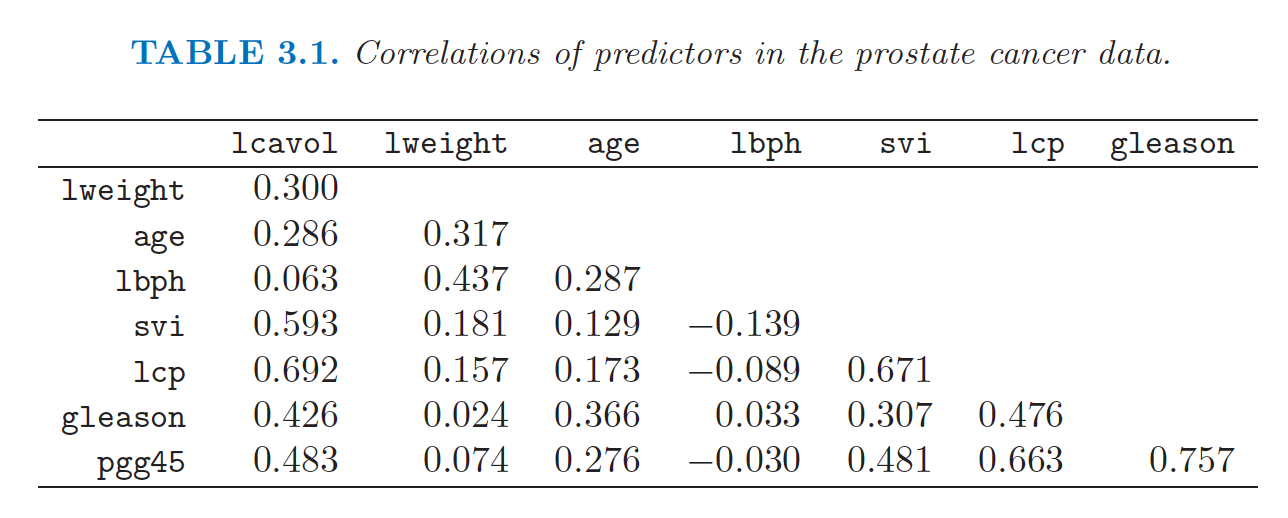

In [11]:
# <img style="width:600px" src="ESLII_table3dot1.png">
Image("images/ESLII_table3dot1.png", width=600)

In [12]:
# write solution here
print("The correlation matrix is")
correlation_matrix = data_train[predictors].corr()
print(correlation_matrix.round(3))

top = correlation_matrix.stack().nlargest(9, keep="last")
top_idx = [(idx[0], idx[1]) for idx in top.index]

print("\nMaximum correlation")
print(top[-1:])

print("\nMax correlation (3 decimal accuracy) is 0.757 between predictors gleason and pgg45")

The correlation matrix is
         lcavol  lweight    age   lbph    svi    lcp  gleason  pgg45
lcavol    1.000    0.300  0.286  0.063  0.593  0.692    0.426  0.483
lweight   0.300    1.000  0.317  0.437  0.181  0.157    0.024  0.074
age       0.286    0.317  1.000  0.287  0.129  0.173    0.366  0.276
lbph      0.063    0.437  0.287  1.000 -0.139 -0.089    0.033 -0.030
svi       0.593    0.181  0.129 -0.139  1.000  0.671    0.307  0.481
lcp       0.692    0.157  0.173 -0.089  0.671  1.000    0.476  0.663
gleason   0.426    0.024  0.366  0.033  0.307  0.476    1.000  0.757
pgg45     0.483    0.074  0.276 -0.030  0.481  0.663    0.757  1.000

Maximum correlation
pgg45  gleason    0.757056
dtype: float64

Max correlation (3 decimal accuracy) is 0.757 between predictors gleason and pgg45


<hr/>

## Question 2: Cyclic Coordinate Descent (CCD) for lasso and elastic net
Read lecture notes discussing the cyclic coordinate descent algorithm (Esa's lecture notes) for lasso and elastic net. <br>

### 2 a) 
Implement the basic CCD Elastic Net (EN) algorithm (<code>ccden</code>) (see *Algorithm 6.1*) by yourself by writing a function named <code>ccden</code> below.  Recall that this algorithm assumes that the predictors are standardized.

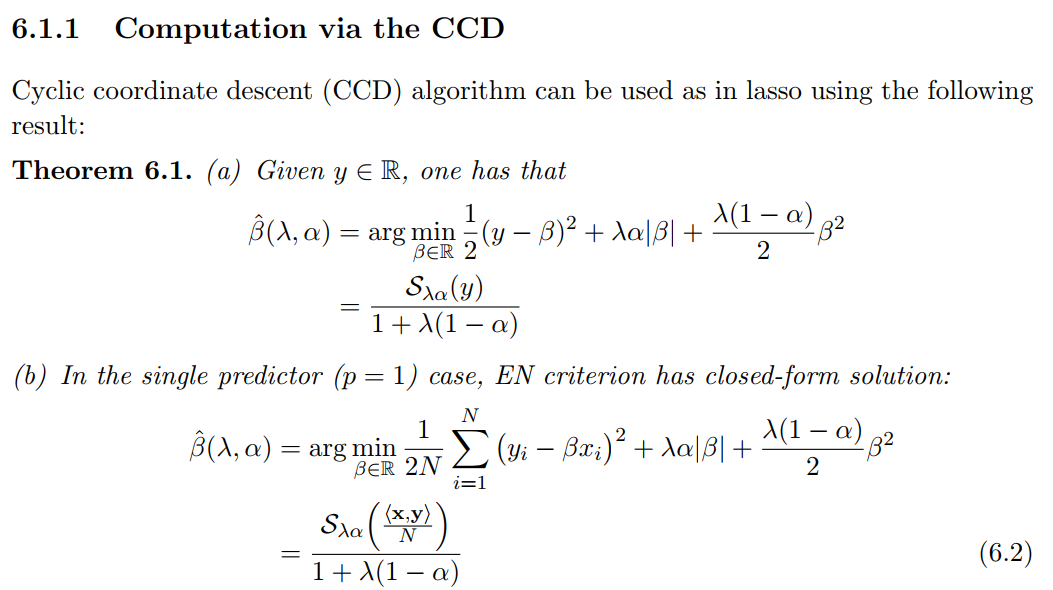

In [13]:
Image("images/611.png", width=600)

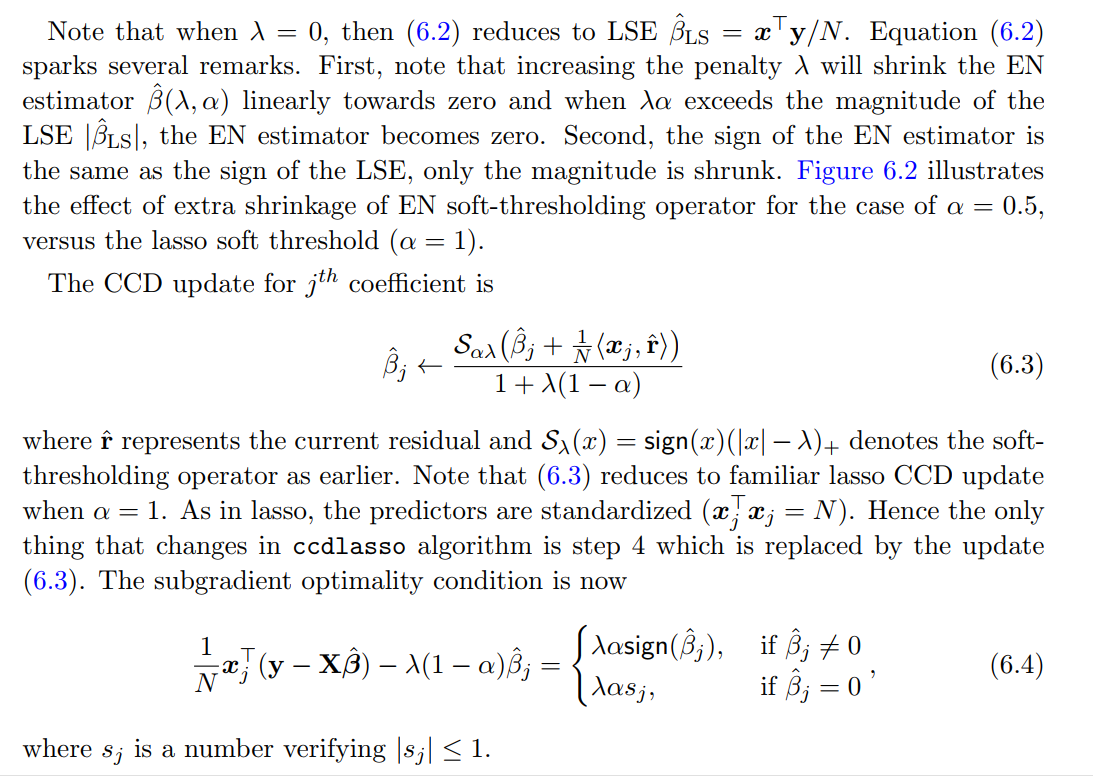

In [14]:
Image("images/612.png", width=600)

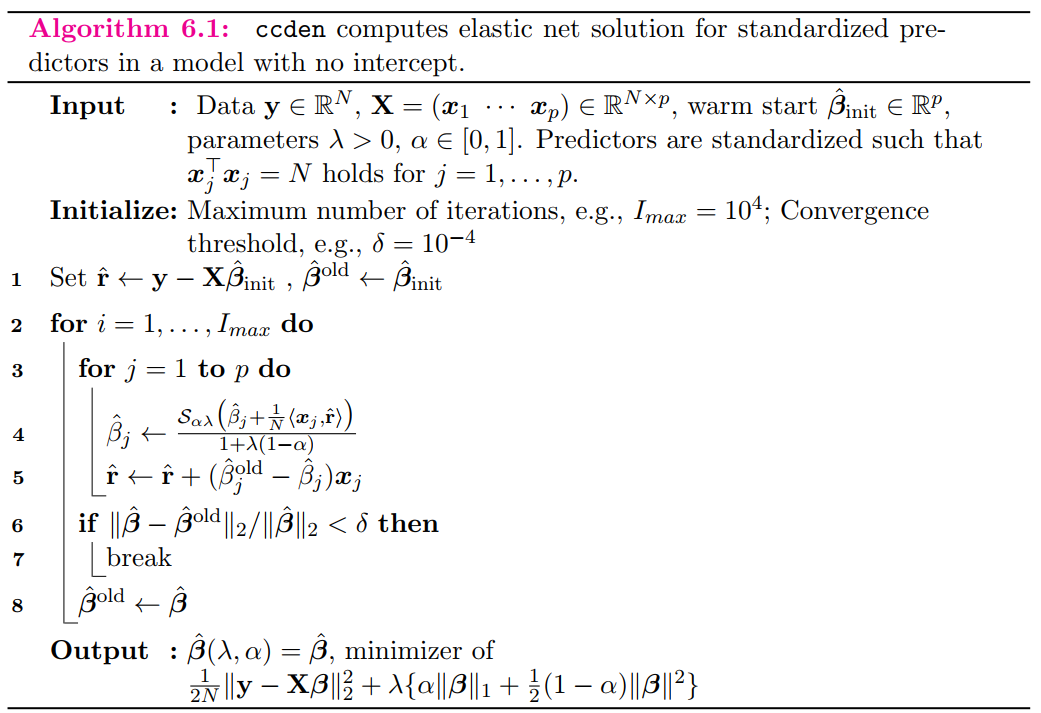

In [15]:
Image("images/CCDEN.png", width=600)

In [16]:
# soft thresholding operator
def calculate_S_alpha_lambda(alpha, Lambda, value):
    S_alpha_lambda = np.sign(value) * np.maximum(np.abs(value) - alpha * Lambda, 0)
    return S_alpha_lambda

def ccden(y, X, beta_init, Lambda, alpha=1.0, delta=1e-12, max_iter=10000):
    rhat = y - X @ beta_init # @ is the same as np.dot
    beta_old = beta_init.copy()
    N, p = X.shape # N = Number of datapoints and p = number of predictors
    # beta_hat is the vector of regression coefficients
    beta_hat = beta_init.copy()
    beta_list = [beta_init.copy()]
    for i in range(1, max_iter + 1):
        for j in range(p):
            beta_hat[j] = calculate_S_alpha_lambda(alpha, Lambda, beta_hat[j] + 1/N * np.dot(X[:,j], rhat)) / (1 + Lambda * (1 - alpha))
            rhat = rhat + (beta_old[j] - beta_hat[j]) * X[:,j] 
            beta_list.append(beta_hat.copy())
        if np.linalg.norm(beta_hat - beta_old)/np.linalg.norm(beta_hat) < delta:
            break
        beta_old = beta_hat.copy()
    print("The stopping iteration of ccden:",i * p)
    return (beta_hat, beta_list)

### 2 b) 
But did my code work? Let's check this out.  So your <code>ccden</code> function has produced you an estimate  that minimizes $\frac{1}{2N} \| \mathbf{y} - \mathbf{X} \boldsymbol{\beta} \|_2^2 + \lambda \alpha \| \boldsymbol{\beta}\|_1 + \frac 1 2 \lambda (1- \alpha)\|\boldsymbol{\beta} \|_2^2 $.  Recall the subgradient optimality conditions:  $\hat{\boldsymbol{\beta}}$ is the solution for EN optimization problem with penalty parameter if and only if equation (6.4) in Lecture notes holds.

Perform these steps:
1. First center both the response and predictor variables of the prostate cancer training data set you created in 1(c). 
2. Then standardize the predictors. 
3. Give this training data as inputs to <code>ccden</code> function to find the solution $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$  with a penalty parameter value $\lambda=0.3$ and $\alpha=1$ (lasso) and $\alpha=0.9$. The initial value of iteration <code>beta_init</code> should be a vector of zeros.
4. Report the solutions 
5. Verify that  the subgradient optimality condition holds for your solutions.   <br>

**Note**: Essentially, items 1 and 2 perform Steps 1 and 2 of Algorithm 5.1  of Esa's lecture notes.  

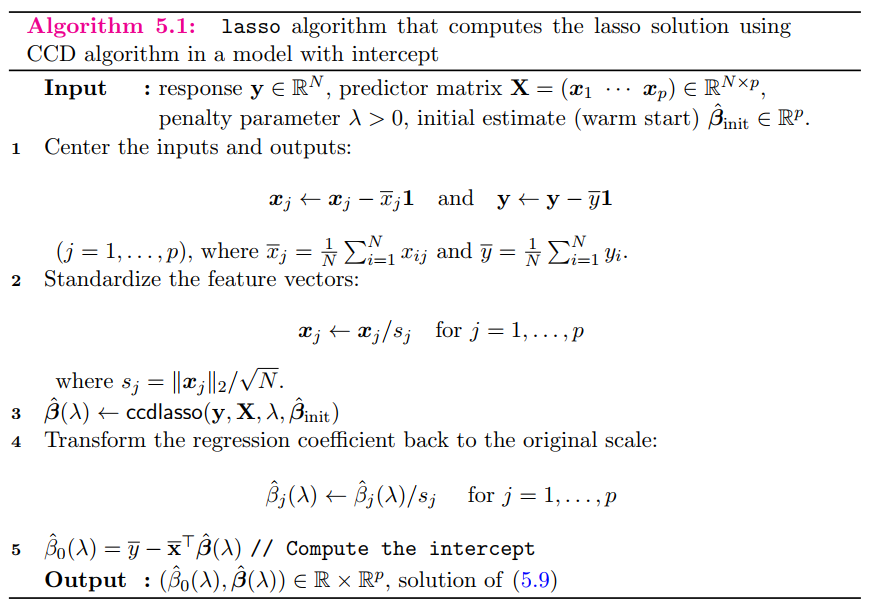

In [17]:
Image("images/CCD_LASSO.png", width=600)

In [18]:
# lambda controls the weighting of the sum of both penalties to the loss function. 
# A default value of 1.0 is used to use the fully weighted penalty; 
# a value of 0 excludes the penalty. Very small values of lambada, 
# such as 1e-3 or smaller, are common
lam = 0.3 # This is the penalty for lasso

# hyperparameter “alpha” is provided to assign how much weight is given to each of the L1 and L2 penalties. 
# Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and 
# one minus the alpha value is used to weight the L2 penalty
al = 0.9 # This is the EN penalty parameter

In [19]:
# step 1 and 2: center and standardize

# Center the data by subtracting the mean of each column
X_train_centered = X_train - np.mean(X_train, axis=0)
X0 = X_train_centered / np.std(X_train_centered, axis=0)
y_train_centered = y_train - np.mean(y_train)
y0 = y_train_centered / np.std(y_train_centered)

# Print the centered training data
print("Standardized X_train:\n", X0[:10])
print("...")
print("Standardized y_train:\n", y0[:10])
print("...")
print("\nShape of X0:", X0.shape)
print("\nShape of y0:", y0.shape)
(N, p) = X0.shape
print(f"\nN = {N}, p = {p}")
# Verify that xj_transpose * xj = N
print("\nVerify that xj_transpose * xj = N")
print(np.dot(np.transpose(X0), X0).diagonal())

Standardized X_train:
 [[-1.53517959 -1.81097918 -1.98042525 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-1.87122084 -0.64791082 -0.90602451 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-1.47923712 -1.97632998  1.24277698 -1.00347165 -0.53708616 -0.84308399
   0.38185676 -0.21554907]
 [-2.04127153 -0.72578526 -0.90602451 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-0.45575567 -0.40956052 -0.36882414 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-1.91627934 -0.83986455 -1.98042525 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-0.50300267 -0.18307203 -0.90602451  1.00876737 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-0.85856191 -0.04644453  0.03407614 -1.00347165 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [-2.15730403 -0.05798078 -0.23452404  0.82296074 -0.53708616 -0.84308399
  -1.03949894 -0.90325324]
 [ 0.24320332 -1.27528029 -0.23452404 -1.00347165 -0.53708616 -0.275

In [20]:
# step 3: compute solutions 
beta_init = np.zeros(p)
beta_hat, _ = ccden(y0, X0, beta_init, lam, al)

The stopping iteration of ccden: 200


In [21]:
# step 4: report the solutions
print("The solution is\n")
print("  ".join([str(round(i,6)) for i in beta_hat]))

print("\nThe model solution is\n")
print("0.408598  0.084859  0.0  0.0  0.028393  0.0  0.0  0.0")

The solution is

0.408578  0.084858  0.0  0.0  0.028404  0.0  0.0  0.0

The model solution is

0.408598  0.084859  0.0  0.0  0.028393  0.0  0.0  0.0


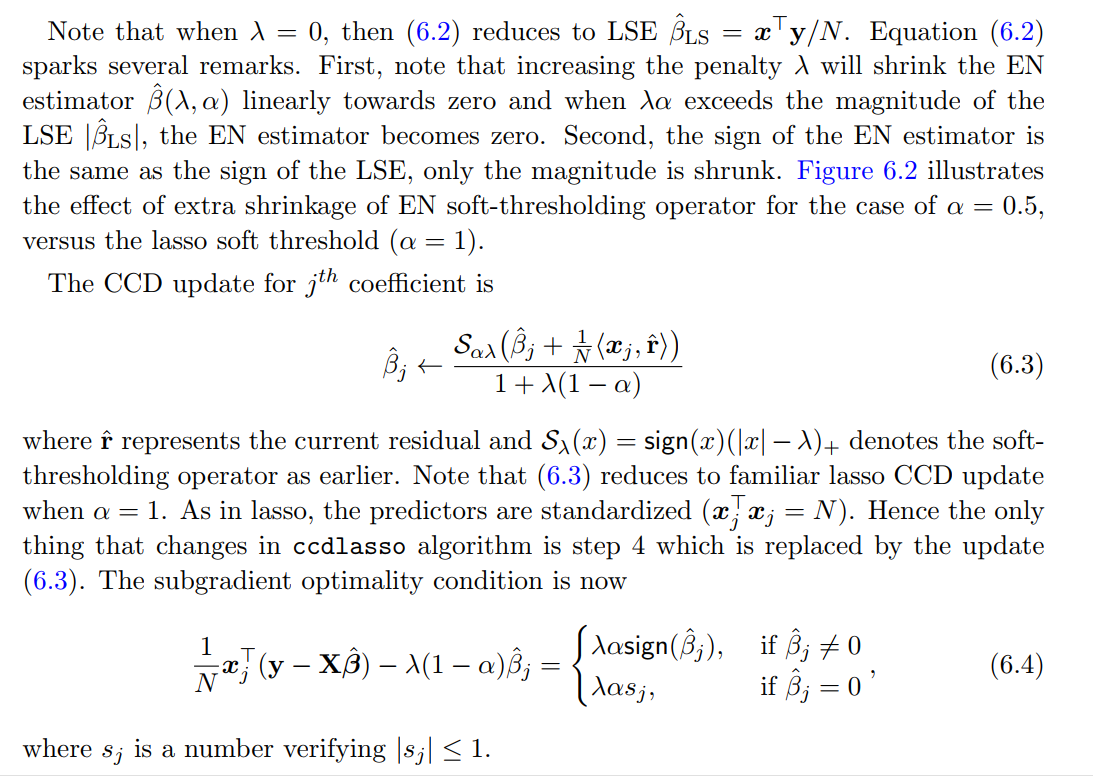

In [22]:
Image("images/612.png", width=600)

When the coefficient $\beta_j$ is exactly equal to zero in the elastic net optimization problem, the subgradient optimality condition is:

$$\frac{\partial L(\beta)}{\partial \beta_j} \bigg|_{\beta_j=0} \in [-\alpha \lambda, \alpha \lambda]$$

where $L(\beta)$ is the loss function, $\lambda$ is the L1 regularization parameter, and $\alpha$ is the mixing parameter between L1 and L2 regularization.

Intuitively, this condition means that the partial derivative of the loss function with respect to $\beta_j$ at $\beta_j=0$ should be between $-\alpha \lambda$ and $\alpha \lambda$. This condition ensures that the objective function cannot be reduced by moving away from $\beta_j=0$ in either the positive or negative direction beyond the L1 regularization threshold $\alpha \lambda$.

In [23]:
# step 5: verify that subgradient equations hold:

def subgradientOptimalityCondition(y, X, beta_hat, Lambda, alpha):
    N, p = X.shape
    for j in range(0, p):
        if (beta_hat[j] != 0):
            leftHandSide = 1/N * np.dot(X[:, j], (y - np.dot(X, beta_hat))) - Lambda * (1 - alpha) * beta_hat[j]
            rightHandSide = Lambda * alpha * np.sign(beta_hat[j])

            if np.abs(leftHandSide - rightHandSide) < 1e-9:
                print(f"Subgradient optimality condition true for predictor {j} - {predictors[j]} (nonzero beta)")
                print(f"{leftHandSide} ≊ {rightHandSide}")
            else: 
                print(f"Subgradient optimality condition false for predictor {j} - {predictors[j]} (nonzero beta)")
                print(f"{leftHandSide} ≄ {rightHandSide}")
        if (beta_hat[j] == 0):
            leftHandSide = 1/N * np.dot(X[:, j], (y - np.dot(X, beta_hat))) - Lambda * (1 - alpha) * beta_hat[j]
            rightHandSide = Lambda * alpha * np.array([-1, 1])
            if leftHandSide >= rightHandSide[0] or leftHandSide <= rightHandSide[1]:
                print(f"Subgradient optimality condition true for predictor {j} - {predictors[j]} (zero beta)")
                print(f"{leftHandSide} ∈ {rightHandSide}")
            else: 
                print(f"Subgradient optimality condition false for predictor {j} - {predictors[j]} (zero beta)")
                print(f"{leftHandSide} ∉ {rightHandSide}")
        print()

subgradientOptimalityCondition(y0, X0, beta_hat, lam, al)

Subgradient optimality condition true for predictor 0 - lcavol (nonzero beta)
0.2699999999999226 ≊ 0.27

Subgradient optimality condition true for predictor 1 - lweight (nonzero beta)
0.26999999999997604 ≊ 0.27

Subgradient optimality condition true for predictor 2 - age (zero beta)
0.08011846132359535 ∈ [-0.27  0.27]

Subgradient optimality condition true for predictor 3 - lbph (zero beta)
0.20399433879556572 ∈ [-0.27  0.27]

Subgradient optimality condition true for predictor 4 - svi (nonzero beta)
0.2700000000000001 ≊ 0.27

Subgradient optimality condition true for predictor 5 - lcp (zero beta)
0.17407515122997433 ∈ [-0.27  0.27]

Subgradient optimality condition true for predictor 6 - gleason (zero beta)
0.157488602205353 ∈ [-0.27  0.27]

Subgradient optimality condition true for predictor 7 - pgg45 (zero beta)
0.23067249190689806 ∈ [-0.27  0.27]



**Note**: You can verify that your code works by checking that  it returns the same value as the following code: 

In [24]:
# y0 and X0 are here the centered / standardized data from 2b)
regLasso0 = LM.Lasso(fit_intercept=False,alpha=lam).fit(X0, y0)
regEN0 = LM.ElasticNet(fit_intercept=False,alpha=lam,l1_ratio=al).fit(X0, y0)
beta_las_star = regLasso0.coef_
beta_en_star = regEN0.coef_
pd.DataFrame(data=(beta_las_star, beta_en_star))

0         1    2    3         4    5    6    7
0  0.414952  0.060633  0.0  0.0  0.000000  0.0  0.0  0.0
1  0.408598  0.084859  0.0  0.0  0.028393  0.0  0.0  0.0

### 2c) 
Then transform the obtained estimates to original scale and compute the intercept, i.e., apply steps 4 and 5 of *Algorithm 5.1*. Report the obtained values of regression coefficents  $\hat{\boldsymbol{\beta}}(\lambda,\alpha)$ and intercept $\hat{\beta}_0(\lambda,\alpha)$ when $(\lambda,\alpha) =(0.3,1)$  and $(\lambda,\alpha)= (0,3,0.9)$. Note that former ($\alpha=1$) yields the lasso solution for the original training data $\mathbf{y}$ and $\mathbf{X}$. Compare the found lasso and EN solution with the LSE solution you computed in question 1d). 

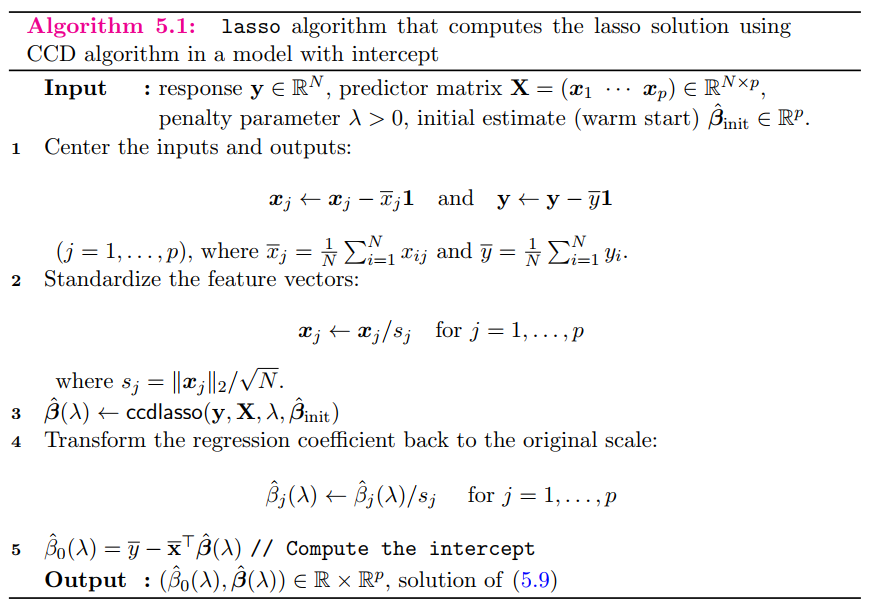

In [25]:
Image("images/CCD_LASSO.png", width=600)

In [26]:
# solution comes here 

def calculateOriginalCoefficientsAndIntercept(X_train, y_train, X0, y0, Lambda, alpha):
    (N, p) = X0.shape
    beta_init = np.zeros(p)
    beta_hat, _ = ccden(y0, X0, beta_init, Lambda, alpha)
    beta_hat_coeff = np.zeros(p)
    for j in range(p):
        beta_hat_coeff[j] = beta_hat[j]/np.std(X_train[:,j])  
    beta_hat_intercept =  np.mean(y_train) - np.dot(np.mean(X_train, axis=0), beta_hat_coeff)
    return (beta_hat_coeff, beta_hat_intercept)
    
regressionResult = df.drop(['Std.Error', 'Z Score'], axis=1)
regressionResult = regressionResult.rename(columns={'Coefficient': 'LSE'})

# First case (lambda, alpha) = (0.3, 1). Alpha = 1 => Only Lasso/L1 regularization
lam, al = 0.3, 1
beta_hat_coeff, beta_hat_intercept = calculateOriginalCoefficientsAndIntercept(X_train, y_train, X0, y0, lam, al)

beta_hat_coeff = np.insert(beta_hat_coeff, 0, beta_hat_intercept)
regressionResult["Lasso"] = beta_hat_coeff

# Second case (lambda, alpha) = (0.3, 0.9) => Elastic net regularization with both L1 and L2
lam, al = 0.3, 0.9
beta_hat_coeff, beta_hat_intercept = calculateOriginalCoefficientsAndIntercept(X_train, y_train, X0, y0, lam, al)

beta_hat_coeff = np.insert(beta_hat_coeff, 0, beta_hat_intercept)
regressionResult["Elastic Net"] = beta_hat_coeff

print("\nThe regression coefficients beta_hat are (no centering and standardization): ")
print(regressionResult)


The stopping iteration of ccden: 104
The stopping iteration of ccden: 200

The regression coefficients beta_hat are (no centering and standardization): 
        Term       LSE     Lasso  Elastic Net
0  Intercept  2.464933  2.464995     2.464449
1     lcavol  0.679528  0.396561     0.390471
2    lweight  0.263053  0.054914     0.076854
3        age -0.141465  0.000000     0.000000
4       lbph  0.210147  0.000000     0.000000
5        svi  0.305201  0.000000     0.028210
6        lcp -0.288493  0.000000     0.000000
7    gleason -0.021305  0.000000     0.000000
8      pgg45  0.266956  0.000000     0.000000


#### The least square error:
According to LSE, all coefficients are non-zero since L1 regularization is not applied. It can be seen the order of importance for the coefficients is (1) lcavol, (2) svi and (3) lweight. 

#### The Lasso regression:
Lasso regularization nearly eliminates all variables, leaving behing only 2 features lcavol and lweight. This is performed as Elastic Net, but since alpha = 1, there is no L2 regularization. It can be seen the order of importance for the coefficients is (1) lcavol, (2) lweight. 

#### The elastic net regression:
Elastic net regularization now includes some L2, mitigating the sparsity effect of L1 regularization. As a result, the third feature is nonzero, which is svi besides lcavol and lweight. It can be seen the order of importance for the coefficients is (1) lcavol, (2) lweight and (3) svi. 

Common points between the three regression methods:
- They all have (nearly) similar intercept value (2.464)
- They all agree lcavol has the greatest effect on the label (largest coefficient)


***

## Question 3: FISTA for lasso
### 3a)
Implement FISTA for the lasso problem (see Lecture notes by prof. Vorobyov, pp. 33)  by yourself by writing a function named <code>fistalasso</code>. 

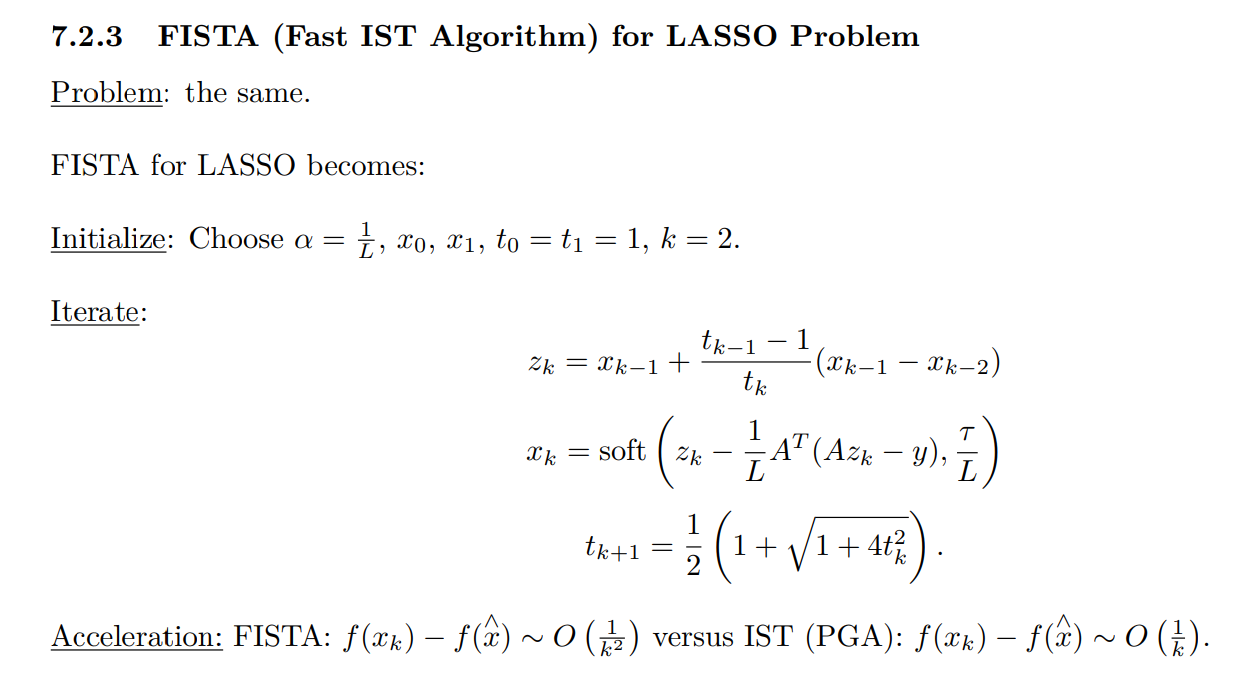

In [27]:
Image("images/FISTA_LASSO.png", width=600)

In [28]:
# soft thresholding operator
def calculate_soft_thresholding(value, threshold):
    soft = np.sign(value) * np.maximum(np.abs(value) - threshold, 0)
    return soft

def fistalasso(y, X, beta_init, tau, delta = 1e-12, max_iter = 1000):
    (N, p) = X.shape

    beta = beta_init.copy() # It is x_k-1 in the figure
    beta_prev = beta_init.copy() # It is x_k-2 in the figure
    # The Lipschitz constant
    L = np.linalg.norm(X) ** 2
    
    # Saving the error
    beta_list = [beta_init.copy()]

    t_prev = 1 # It is t_k-1 in the figure
    t = 1 # it is t_k in the figure

    # Originally, k = 2
    for k in range(1, max_iter + 1):
        z = beta + (t_prev - 1)/t * (beta - beta_prev)
        # Saving the x_k-2
        beta_prev = beta.copy()
        beta = calculate_soft_thresholding(z - 1/L * (X.T @ (X @ z - y)), tau / L)
        # Saving the t_k
        t_prev = t
        # calculate t_k+1
        t = 1/2 * (1 + np.sqrt(1 + 4 * t ** 2))
        beta_list.append(beta.copy())
        if np.linalg.norm(beta - beta_prev)/np.linalg.norm(beta) < delta:
            break
    print("The stopping iteration of fista:", k)
    return (beta, beta_list)

### 3 b) 
Use the same data set as in question 2b). Show the convergence graphs (as in Assignment 1) for both FISTA and CCD and compare. 
Use the value <code>beta_las_star</code> (obtained in Note of question 2b)  as the true optimum $\boldsymbol{\beta}^*$ of the lasso objective function.   

In [29]:
# compute the values

beta_init = np.zeros(X0.shape[1])
delta = 1e-6

# Cyclic Coordinate Descent for Elastic Net
lam, al = 0.3, 1
beta_ccden, beta_list_ccden = ccden(y0, X0, beta_init, lam, al, delta)

# FISTA for LASSO
# tau is the learning rate
tau = 20
beta_fista, beta_list_fista = fistalasso(y0, X0, beta_init, tau, delta)


print("\nThe LASSO solution β by CCD elastic net is")
print("  ".join([i for i in predictors]))
print("  ".join([str(round(i,6)) for i in beta_ccden]))

print("\nThe LASSO solution β by FISTA is")
print("  ".join([i for i in predictors]))
print("  ".join([str(round(i,6)) for i in beta_fista]))

print("\nThe optimal LASSO solution β* is")
print("  ".join([i for i in predictors]))
print("  ".join([str(round(i,6)) for i in beta_las_star]))



The stopping iteration of ccden: 56
The stopping iteration of fista: 145

The LASSO solution β by CCD elastic net is
lcavol  lweight  age  lbph  svi  lcp  gleason  pgg45
0.414951  0.060634  0.0  0.0  0.0  0.0  0.0  0.0

The LASSO solution β by FISTA is
lcavol  lweight  age  lbph  svi  lcp  gleason  pgg45
0.415656  0.061783  0.0  0.0  0.000736  0.0  0.0  0.0

The optimal LASSO solution β* is
lcavol  lweight  age  lbph  svi  lcp  gleason  pgg45
0.414952  0.060633  0.0  0.0  0.0  0.0  0.0  0.0


According to a source, cyclic coordinate descent is faster than FISTA on the LASSO problem when there are few variables in the model, which is 8 in this case. In fact, CCD converges extremely fast for LASSO

https://stats.stackexchange.com/questions/146317/when-should-one-use-coordinate-descent-vs-gradient-descent 

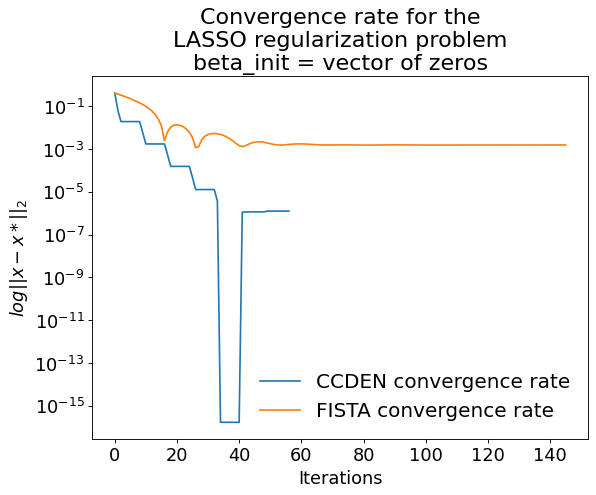

In [30]:
# show convergerence graph 
# Plotting the difference norms log ||x - x*||2

differenceNormsCCDEN = [np.linalg.norm(beta - beta_las_star) for beta in beta_list_ccden] 
differenceNormsFISTA = [np.linalg.norm(beta - beta_las_star) for beta in beta_list_fista] 

def plotDifferenceNorms(differenceNorms, algorithmNames):
    figure(figsize=(8, 6), dpi=80)
    size = 16
    for i in range(len(algorithmNames)):
        iterations = np.arange(0, len(differenceNorms[i]), 1)
        plt.plot(iterations, differenceNorms[i], label = f"{algorithmNames[i]} convergence rate")
    plt.title(f"Convergence rate for the\nLASSO regularization problem\nbeta_init = vector of zeros", size=size + 4)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    # Plotting the log graph in base 2
    plt.yscale('log', base=10)
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)
    plt.legend(loc=4, frameon=False, fontsize=size + 2)
    plt.show()

differenceNorms = [differenceNormsCCDEN, differenceNormsFISTA]
algorithmNames = ["CCDEN", "FISTA"]
plotDifferenceNorms(differenceNorms, algorithmNames)

For FISTA, the error convergence rate behaves as expected (like Assignment 1)

For CCDEN, the error convergence error rate looks like a staircase. It appears that for each cycle (one cycle is 8 iterations, since there are 8 predictors), the error decreases by the first two predictors (lcavol, lweight), and stay flat for the last six predictors, from age to pgg45.

This is because after a cycle, CCDEN only changes the two most important predictors, while the others are not updated at all according to the soft thresholding operator. At the fifth cycle (iteration 32-40), CCDEN error decreases extremely fast by updating only lcavol and lweight. However, the error shoots up again and stabilizes at the sixth and seventh cycles (after iteration 40). 

Conclusion: the idea that CCDEN converges much faster than FISTA is confirmed from the error convergence graph. Currently, CCD is the state-of-the-art algorithm for solving the LASSO regularization problem. 

***
## Question 4: Alternating Direction Method of Multipliers for lasso
### 4 a)
Implement Alternating Direction Method of Multipliers (ADMM) for the lasso problem (see Lecture notes by prof. Vorobyov,  pp. 34) by yourself by writing a function named <code>admmlasso</code>.  Use $\rho=1$ in the ADMM algorithm.  

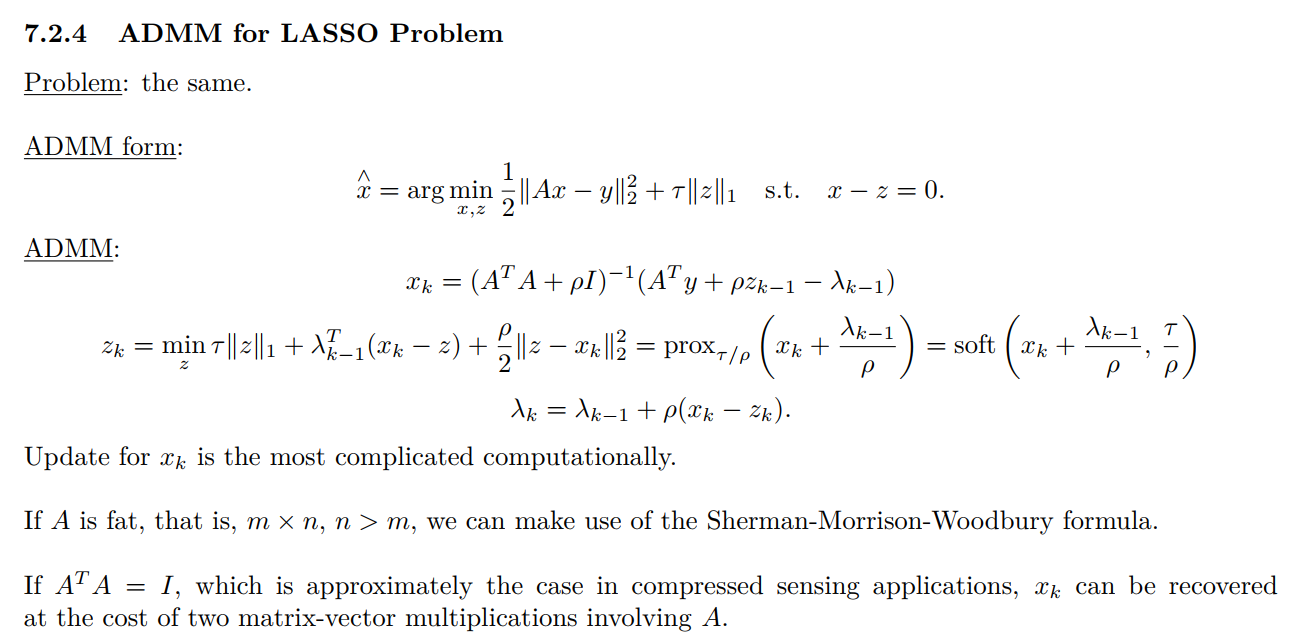

In [31]:
Image("images/ADMM_LASSO.png", width=600)

In [32]:
# soft thresholding operator
def calculate_soft_thresholding(value, threshold):
    soft = np.sign(value) * np.maximum(np.abs(value) - threshold, 0)
    return soft

def admmlasso(y, X, beta_init, tau, delta = 1e-12, max_iter = 1000):
    (N, p) = X.shape
    beta_prev = beta_init.copy()
    beta = beta_init.copy() # It is x_k in the figure
    z = beta_init.copy() # It is z_k-1 in the figure
    # Initial condition x (or beta) - z = 0 is satisfied
    # The Lagrangian multiplier
    Lambda = beta_init.copy() #It is lambda_k-1 in the figure
    # rho value
    rho = 1
    # Saving the error
    beta_list = [beta_init.copy()]
    # The identity matrix
    I = np.eye(p)
    # Originally, k = 2
    for k in range(1, max_iter + 1):
        # This is equivalent to solving a linear system of equations
        beta = np.linalg.inv(X.T @ X + rho * I) @ (X.T @ y + rho * z - Lambda)
        z = calculate_soft_thresholding(beta + Lambda/rho, tau/rho)
        Lambda = Lambda + rho * (beta - z)
        beta_list.append(beta.copy())
        if np.linalg.norm(beta - beta_prev)/np.linalg.norm(beta) < delta:
            break
        beta_prev = beta.copy()
    print("The stopping iteration of admm:", k)
    return (beta, beta_list)
    

### 4b)
Show the convergence graph of ADMM implementation and compare it to that of FISTA and CCD from the previous problems.

In [33]:
# compute the values

beta_init = np.zeros(X0.shape[1])
delta = 1e-9
tau = 20.1

# Alternating Direction Method of Multipliers
beta_admm, beta_list_admm = admmlasso(y0, X0, beta_init, tau, delta, 1000)

print("\nThe LASSO solution β by ADMM is")
print("  ".join([i for i in predictors]))
print("  ".join([str(round(i,6)) for i in beta_admm]))

print("\nThe optimal LASSO solution β* is")
print("  ".join([i for i in predictors]))
print("  ".join([str(round(i,6)) for i in beta_las_star]))


The stopping iteration of admm: 1000

The LASSO solution β by ADMM is
lcavol  lweight  age  lbph  svi  lcp  gleason  pgg45
0.414919  0.060635  1e-05  -0.0  7e-06  1e-05  1.9e-05  1.9e-05

The optimal LASSO solution β* is
lcavol  lweight  age  lbph  svi  lcp  gleason  pgg45
0.414952  0.060633  0.0  0.0  0.0  0.0  0.0  0.0


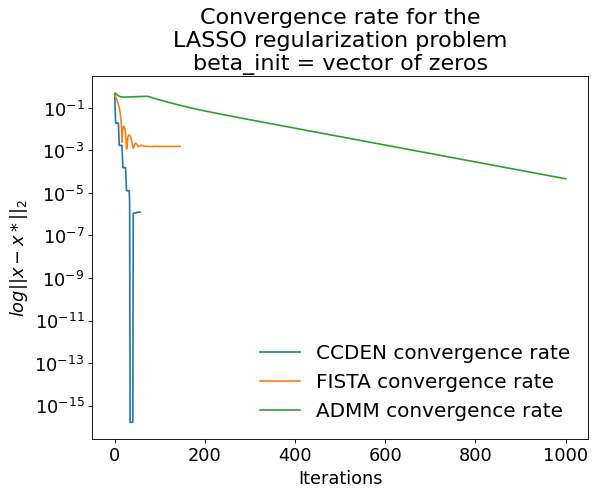

In [34]:
# show convergerence graph 
# Plotting the difference norms log ||x - x*||2

differenceNormsCCDEN = [np.linalg.norm(beta - beta_las_star) for beta in beta_list_ccden] 
differenceNormsFISTA = [np.linalg.norm(beta - beta_las_star) for beta in beta_list_fista] 
differenceNormsADMM = [np.linalg.norm(beta - beta_las_star) for beta in beta_list_admm] 

def plotDifferenceNorms(differenceNorms, algorithmNames):
    figure(figsize=(8, 6), dpi=80)
    size = 16
    for i in range(len(algorithmNames)):
        iterations = np.arange(0, len(differenceNorms[i]), 1)
        plt.plot(iterations, differenceNorms[i], label = f"{algorithmNames[i]} convergence rate")
    plt.title(f"Convergence rate for the\nLASSO regularization problem\nbeta_init = vector of zeros", size=size + 4)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    # Plotting the log graph in base 2
    plt.yscale('log', base=10)
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)
    plt.legend(loc=4, frameon=False, fontsize=size + 2)
    plt.show()

differenceNorms = [differenceNormsCCDEN, differenceNormsFISTA, differenceNormsADMM]
algorithmNames = ["CCDEN", "FISTA", "ADMM"]
plotDifferenceNorms(differenceNorms, algorithmNames)

From the figure, it can be seen that ADMM has a slow tail convergence. Some of the observations are

• ADMM does one cycle of block-coordinate descent in (x, z)

• The min over x and z add only quadratic term to the loss and the regularizing penalty, respectively, and thus, ADMM does not alter the cost much

• ADMM is extremely sensitive to the tau parameter. Tuning it carefully may give better results 

• The matrix X.T @ X + rho * I is always invertible, regardless of X

Conclusion: ADMM can be slower than other algorithms for problems that have a simple structure and can be solved using a direct method or a faster algorithm such as coordinate descent or FISTA. On the other hand, ADMM can be faster for problems that have a complex structure and cannot be solved using a direct method or a faster algorithm.

Overall, the convergence speed for the three algorithms are: CCDEN > FISTA > ADMM